In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
uber_data = pd.read_csv("./Uber Request Data.csv")

In [20]:
##Initial Analysis

In [21]:
print(uber_data.shape)
print(uber_data.info())
print(uber_data.columns)

(6745, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
None
Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')


In [22]:
##Data Cleaning and Data Preparation

In [23]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [24]:
uber_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [25]:
uber_data['Driver id'].describe()

count    4095.000000
mean      149.501343
std        86.051994
min         1.000000
25%        75.000000
50%       149.000000
75%       224.000000
max       300.000000
Name: Driver id, dtype: float64

In [26]:
uber_data[np.isnan(uber_data['Driver id'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,11/7/2016 0:02,NaN
4096,1364,City,NaN,No Cars Available,11/7/2016 0:06,NaN
4097,1366,City,NaN,No Cars Available,11/7/2016 0:09,NaN
4098,2,Airport,NaN,No Cars Available,11/7/2016 0:23,NaN
4099,7,Airport,NaN,No Cars Available,11/7/2016 0:30,NaN
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [27]:
##Data Analysis

In [35]:
def getTimeOfDay(x):
    if x>=5 and x<8:
        tod="Early Morning"
    elif x>=8 and x<12:
        tod="Morning"
    elif x>=12 and x<16:
        tod="Afternoon"
    elif x>=16 and x<19:
        tod="Evening"
    elif x>=19 and x<23:
        tod="Night"
    else:
        tod="Late Night"
    return tod

In [38]:
trip_incomplete=['Cancelled','No Cars Available']
uber_data_incomplete_trip=uber_data.loc[uber_data['Status'].isin(trip_incomplete)]

KeyError: 0

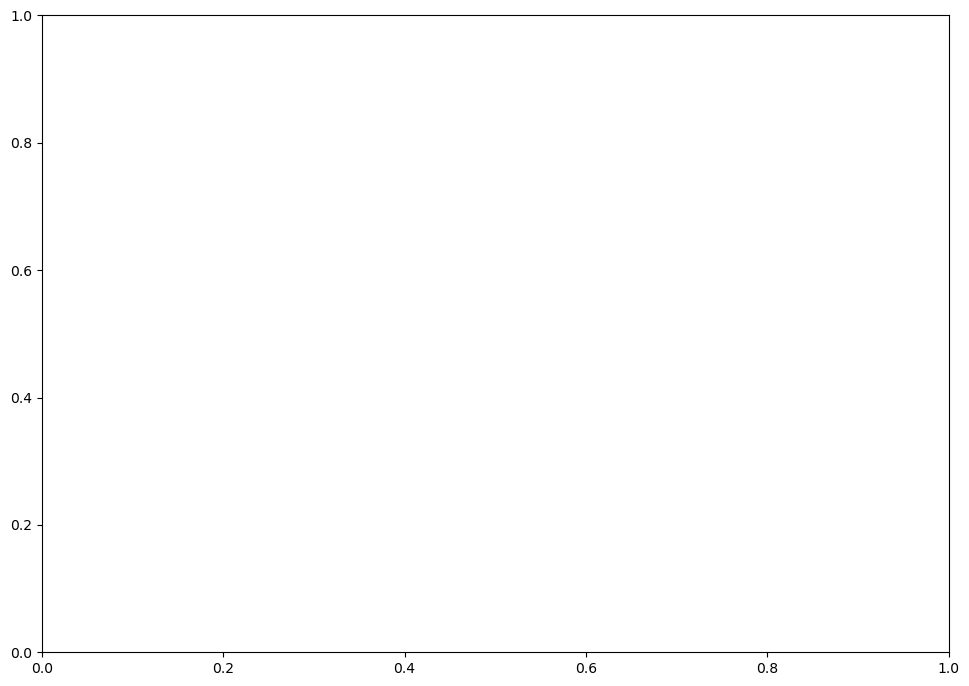

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
figure1= sns.countplot(uber_data_incomplete_trip['Pickup point'])
figure1.set_title('Most problematic requests')
for p in figure1.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    figure1.annotate(int(y),(x.mean(),y),
            ha='center', va='bottom') 

ValueError: Cannot use `hue` without `x` and `y`

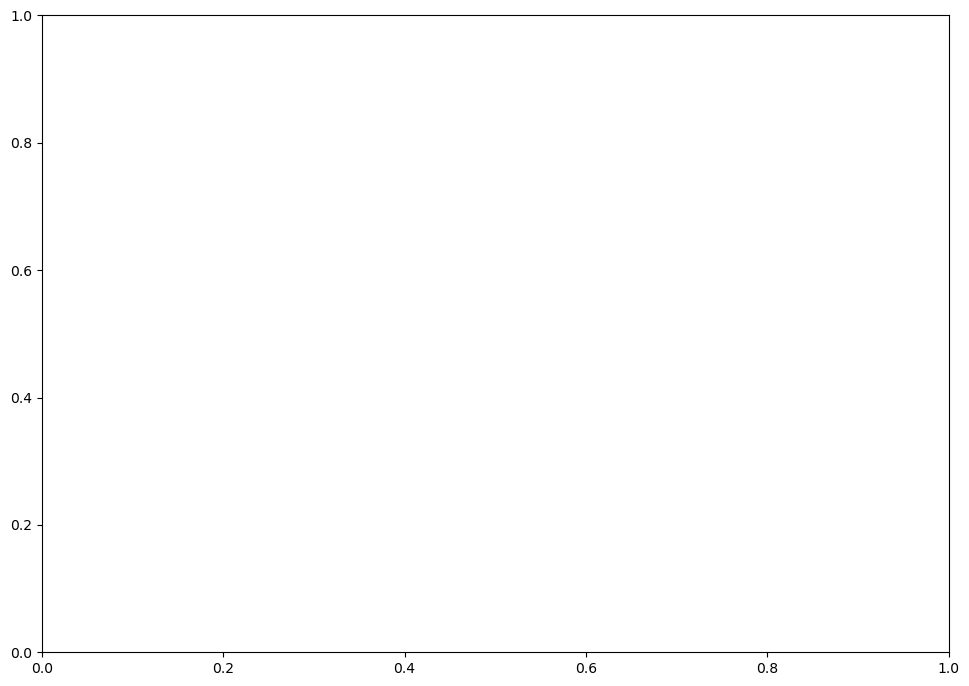

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
figure2= sns.countplot(uber_data_incomplete_trip['Status'],hue=uber_data_incomplete_trip['Pickup point'])
figure2.set_title('Frequency of trips with their respective status')
for p in figure2.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    figure2.annotate((int(y)),(x.mean(),y),
            ha='center', va='bottom')

KeyError: 'Time of Day'

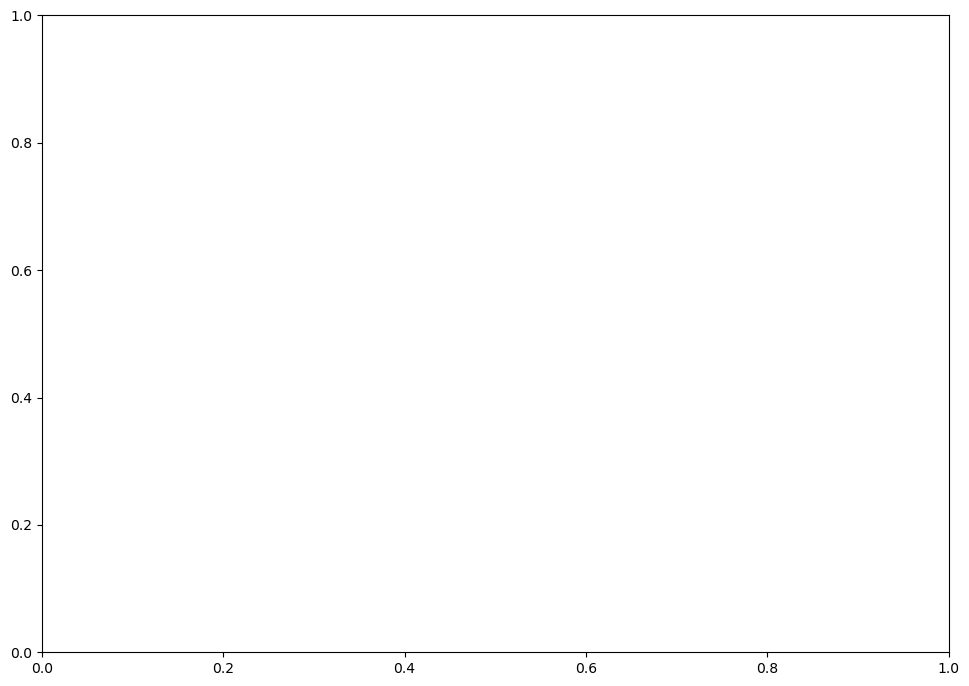

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
figure3=sns.countplot(uber_data_incomplete_trip['Time of Day'],hue=uber_data_incomplete_trip['Status'])
figure3.set_title('Frequency of trips during the day with their respective status')
for p in figure3.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    figure3.annotate(int(y),(x.mean(),y),
            ha='center', va='bottom') 

In [42]:
figure=sns.catplot(x='Time of Day',y='Hours', hue='Pickup point',col='Status',kind='swarm',data=uber_data_incomplete_trip,height=2,aspect=4)
figure.fig.set_size_inches(15,15)
figure.set(yticks=range(0,23))

ValueError: Could not interpret value `Time of Day` for parameter `x`

NameError: name 'supply_demand_pickuppoint' is not defined

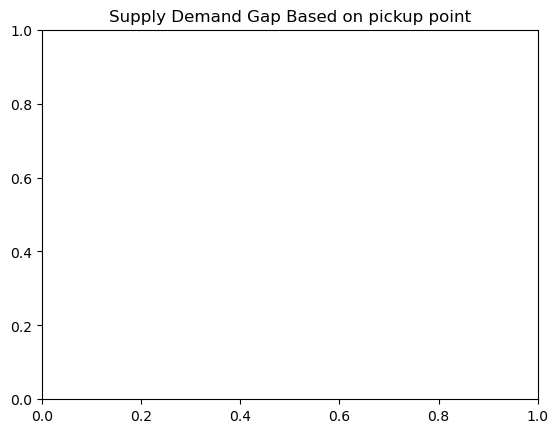

In [43]:
fig,ax1= plt.subplots()
ax1.set_title('Supply Demand Gap Based on pickup point')
ax1.bar(supply_demand_pickuppoint.index,supply_demand_pickuppoint['Supply Demand Gap'])
ax1.set_xlabel("Pickup point")
ax1.set_ylabel("Number of Requests per time slot");